In [1]:
from multi_rake import Rake

text_en = (
    'Compatibility of systems of linear constraints over the set of '
    'natural numbers. Criteria of compatibility of a system of linear '
    'Diophantine equations, strict inequations, and nonstrict inequations '
    'are considered. Upper bounds for components of a minimal set of '
    'solutions and algorithms of construction of minimal generating sets '
    'of solutions for all types of systems are given. These criteria and '
    'the corresponding algorithms for constructing a minimal supporting '
    'set of solutions can be used in solving all the considered types of '
    'systems and systems of mixed types.'
)

In [2]:
rake = Rake()

keywords = rake.apply(text_en)

print(keywords[:10])

[('minimal generating sets', 8.666666666666666), ('linear diophantine equations', 8.5), ('minimal supporting set', 7.666666666666666), ('minimal set', 4.666666666666666), ('linear constraints', 4.5), ('natural numbers', 4.0), ('strict inequations', 4.0), ('nonstrict inequations', 4.0), ('upper bounds', 4.0), ('mixed types', 3.666666666666667)]


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']


In [3]:
import nltk
lines = 'lines is some string of words'
tokenized = nltk.word_tokenize(lines)
nouns = [word for (word, pos) in nltk.pos_tag(tokenized) if(pos[:2] == 'NN')]
print (nouns)

['lines', 'string', 'words']


In [ ]:
# https://towardsdatascience.com/text-analysis-feature-engineering-with-nlp-502d6ea9225d

In [18]:
## for data
import pandas as pd
import collections
import json ## for plotting
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud ## for text processing
import re
import nltk ## for language detection
import langdetect ## for sentiment
from textblob import TextBlob## for ner
import spacy ## for vectorizer
from sklearn import feature_extraction, manifold ## for word embedding
import gensim.downloader as gensim_api ## for topic modeling
import gensim

In [20]:
lst_dics = []
with open('data.json', mode='r', errors='ignore') as json_file:
    for dic in json_file:
        lst_dics.append( json.loads(dic) )## print the first one      
lst_dics[0]

{'category': 'CRIME',
 'headline': 'There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV',
 'authors': 'Melissa Jeltsen',
 'link': 'https://www.huffingtonpost.com/entry/texas-amanda-painter-mass-shooting_us_5b081ab4e4b0802d69caad89',
 'short_description': 'She left her husband. He killed their children. Just another day in America.',
 'date': '2018-05-26'}

In [21]:
## create dtf
dtf = pd.DataFrame(lst_dics)## filter categories
dtf = dtf[ dtf["category"].isin(['ENTERTAINMENT','POLITICS','TECH']) ][["category","headline"]]## rename columns
dtf = dtf.rename(columns={"category":"y", "headline":"text"})## print 5 random rows
dtf.sample(5)

,y,text
61893,POLITICS,Hillary and Bill and Paul Krugman Race to the ...
13,POLITICS,Trump's Crackdown On Immigrant Parents Puts Mo...
198274,ENTERTAINMENT,"Chris Brown And Rihanna Offend, 'Wanderlust' H..."
45743,POLITICS,GOP Congressman Has A Wish List Of Trump Alter...
86022,ENTERTAINMENT,President Obama Got Confirmation Jon Snow Is R...


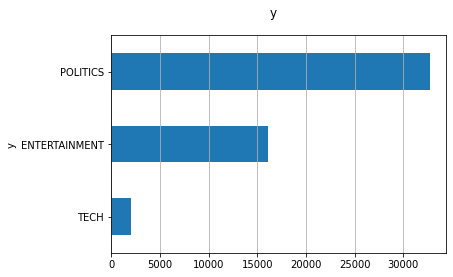

In [24]:
x = "y" 

fig, ax = plt.subplots()
fig.suptitle(x, fontsize=12)
dtf[x].reset_index().groupby(x).count().sort_values(by= 
       "index").plot(kind="barh", legend=False, 
        ax=ax).grid(axis='x')
plt.show()

In [26]:
txt = dtf["text"].iloc[0]

print(txt, " --> ", langdetect.detect(txt))

Will Smith Joins Diplo And Nicky Jam For The 2018 World Cup's Official Song  -->  en


In [28]:
dtf['lang'] = dtf["text"].apply(lambda x: langdetect.detect(x) if 
                                 x.strip() != "" else "")

dtf.head()

,y,text,lang
1,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,en
2,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,en
3,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,en
4,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,en
5,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harass...,en


In [29]:
dtf = dtf[dtf["lang"]=="en"]

In [30]:
print("--- original ---")
print(txt)print("--- cleaning ---")
txt = re.sub(r'[^\w\s]', '', str(txt).lower().strip())
print(txt)print("--- tokenization ---")
txt = txt.split()
print(txt)

SyntaxError: invalid syntax (<ipython-input-30-881652dd980f>, line 2)

In [ ]:
lst_stopwords = nltk.corpus.stopwords.words("english")
lst_stopwords

In [ ]:
print("--- remove stopwords ---")
txt = [word for word in txt if word not in lst_stopwords]
print(txt)

In [ ]:
print("--- stemming ---")
ps = nltk.stem.porter.PorterStemmer()
print([ps.stem(word) for word in txt])print("--- lemmatisation ---")
lem = nltk.stem.wordnet.WordNetLemmatizer()
print([lem.lemmatize(word) for word in txt])

In [ ]:
'''
Preprocess a string.
:parameter
    :param text: string - name of column containing text
    :param lst_stopwords: list - list of stopwords to remove
    :param flg_stemm: bool - whether stemming is to be applied
    :param flg_lemm: bool - whether lemmitisation is to be applied
:return
    cleaned text
'''
def utils_preprocess_text(text, flg_stemm=False, flg_lemm=True, lst_stopwords=None):
    ## clean (convert to lowercase and remove punctuations and characters and then strip)
    text = re.sub(r'[^\w\s]', '', str(text).lower().strip())
            
    ## Tokenize (convert from string to list)
    lst_text = text.split()    ## remove Stopwords
    if lst_stopwords is not None:
        lst_text = [word for word in lst_text if word not in 
                    lst_stopwords]
                
    ## Stemming (remove -ing, -ly, ...)
    if flg_stemm == True:
        ps = nltk.stem.porter.PorterStemmer()
        lst_text = [ps.stem(word) for word in lst_text]
                
    ## Lemmatisation (convert the word into root word)
    if flg_lemm == True:
        lem = nltk.stem.wordnet.WordNetLemmatizer()
        lst_text = [lem.lemmatize(word) for word in lst_text]
            
    ## back to string from list
    text = " ".join(lst_text)
    return text

In [ ]:
dtf["text_clean"] = dtf["text"].apply(lambda x: utils_preprocess_text(x, flg_stemm=False, flg_lemm=True, lst_stopwords))

In [ ]:
dtf.head()

In [ ]:
print(dtf["text"].iloc[0], " --> ", dtf["text_clean"].iloc[0])

In [ ]:
dtf['word_count'] = dtf["text"].apply(lambda x: len(str(x).split(" ")))dtf['char_count'] = dtf["text"].apply(lambda x: sum(len(word) for word in str(x).split(" ")))dtf['sentence_count'] = dtf["text"].apply(lambda x: len(str(x).split(".")))dtf['avg_word_length'] = dtf['char_count'] / dtf['word_count']dtf['avg_sentence_lenght'] = dtf['word_count'] / dtf['sentence_count']dtf.head()

In [ ]:
x, y = "char_count", "y"fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle(x, fontsize=12)
for i in dtf[y].unique():
    sns.distplot(dtf[dtf[y]==i][x], hist=True, kde=False, 
                 bins=10, hist_kws={"alpha":0.8}, 
                 axlabel="histogram", ax=ax[0])
    sns.distplot(dtf[dtf[y]==i][x], hist=False, kde=True, 
                 kde_kws={"shade":True}, axlabel="density",   
                 ax=ax[1])
ax[0].grid(True)
ax[0].legend(dtf[y].unique())
ax[1].grid(True)
plt.show()

In [ ]:
x, y = "char_count", "y"fig, ax = plt.subplots(nrows=1, ncols=2)
fig.suptitle(x, fontsize=12)
for i in dtf[y].unique():
    sns.distplot(dtf[dtf[y]==i][x], hist=True, kde=False, 
                 bins=10, hist_kws={"alpha":0.8}, 
                 axlabel="histogram", ax=ax[0])
    sns.distplot(dtf[dtf[y]==i][x], hist=False, kde=True, 
                 kde_kws={"shade":True}, axlabel="density",   
                 ax=ax[1])
ax[0].grid(True)
ax[0].legend(dtf[y].unique())
ax[1].grid(True)
plt.show()

In [ ]:
print(dtf["text"].iloc[0], " --> ", dtf["sentiment"].iloc[0])

In [ ]:
## call model
ner = spacy.load("en_core_web_lg")## tag text
txt = dtf["text"].iloc[0]
doc = ner(txt)## display result
spacy.displacy.render(doc, style="ent")

In [31]:
## tag text and exctract tags into a list
dtf["tags"] = dtf["text"].apply(lambda x: [(tag.text, tag.label_) 
                                for tag in ner(x).ents] )## utils function to count the element of a list
def utils_lst_count(lst):
    dic_counter = collections.Counter()
    for x in lst:
        dic_counter[x] += 1
    dic_counter = collections.OrderedDict( 
                     sorted(dic_counter.items(), 
                     key=lambda x: x[1], reverse=True))
    lst_count = [ {key:value} for key,value in dic_counter.items() ]
    return lst_count
## count tags
dtf["tags"] = dtf["tags"].apply(lambda x: utils_lst_count(x))
## utils function create new column for each tag category
def utils_ner_features(lst_dics_tuples, tag):
    if len(lst_dics_tuples) > 0:
        tag_type = []
        for dic_tuples in lst_dics_tuples:
            for tuple in dic_tuples:
                type, n = tuple[1], dic_tuples[tuple]
                tag_type = tag_type + [type]*n
                dic_counter = collections.Counter()
                for x in tag_type:
                    dic_counter[x] += 1
        return dic_counter[tag]
    else:
        return 0
## extract features
tags_set = []
for lst in dtf["tags"].tolist():
     for dic in lst:
          for k in dic.keys():
              tags_set.append(k[1])
tags_set = list(set(tags_set))
for feature in tags_set:
     dtf["tags_"+feature] = dtf["tags"].apply(lambda x: 
                             utils_ner_features(x, feature))
## print result
dtf.head()

NameError: name 'ner' is not defined

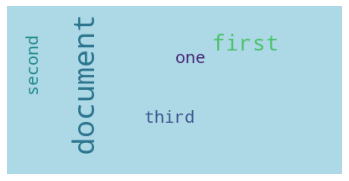

In [33]:
wc = wordcloud.WordCloud(background_color='lightblue', max_words=100, 
                         max_font_size=35)
wc = wc.generate(str(corpus))
fig = plt.figure(num=1)
plt.axis('off')
plt.imshow(wc, cmap=None)
plt.show()

In [ ]:
# https://www.absentdata.com/python-graphs/python-word-frequency/

In [36]:
# loading in all the essentials for data manipulation
import pandas as pd
import numpy as np
#load inthe NTLK stopwords to remove articles, preposition and other words that are not actionable
from nltk.corpus import stopwords
# This allows to create individual objects from a bog of words
from nltk.tokenize import word_tokenize
# Lemmatizer helps to reduce words to the base form
from nltk.stem import WordNetLemmatizer
# Ngrams allows to group words in common pairs or trigrams..etc
from nltk import ngrams
# We can use counter to count the objects
from collections import Counter
# This is our visual library
import seaborn as sns
import matplotlib.pyplot as plt

In [38]:
def word_frequency(sentence):
# joins all the sentenses
sentence =" ".join(sentence)
# creates tokens, creates lower class, removes numbers and lemmatizes the words
new_tokens = word_tokenize(sentence)
new_tokens = [t.lower() for t in new_tokens]
new_tokens =[t for t in new_tokens if t not in stopwords.words('english')]
new_tokens = [t for t in new_tokens if t.isalpha()]
lemmatizer = WordNetLemmatizer()
new_tokens =[lemmatizer.lemmatize(t) for t in new_tokens]
#counts the words, pairs and trigrams
counted = Counter(new_tokens)
counted_2= Counter(ngrams(new_tokens,2))
counted_3= Counter(ngrams(new_tokens,3))
#creates 3 data frames and returns thems
word_freq = pd.DataFrame(counted.items(),columns=['word','frequency']).sort_values(by='frequency',ascending=False)
word_pairs =pd.DataFrame(counted_2.items(),columns=['pairs','frequency']).sort_values(by='frequency',ascending=False)
trigrams =pd.DataFrame(counted_3.items(),columns=['trigrams','frequency']).sort_values(by='frequency',ascending=False)
return word_freq,word_pairs,trigrams

IndentationError: expected an indented block (<ipython-input-38-dfb01005917b>, line 3)

In [39]:
import urllib.request
from collections import Counter

import numpy as np 

from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

# Our sample textfile.
url = 'https://raw.githubusercontent.com/Simdiva/DSL-Task/master/data/DSLCC-v2.0/test/test.txt'
response = urllib.request.urlopen(url)
data = response.read().decode('utf8')


# Note that `ngram_range=(1, 1)` means we want to extract Unigrams, i.e. tokens.
ngram_vectorizer = CountVectorizer(analyzer='word', tokenizer=word_tokenize, ngram_range=(1, 1), min_df=1)
# X matrix where the row represents sentences and column is our one-hot vector for each token in our vocabulary
X = ngram_vectorizer.fit_transform(data.split('\n'))

# Vocabulary
vocab = list(ngram_vectorizer.get_feature_names())

# Column-wise sum of the X matrix.
# It's some crazy numpy syntax that looks horribly unpythonic
# For details, see http://stackoverflow.com/questions/3337301/numpy-matrix-to-array
# and http://stackoverflow.com/questions/13567345/how-to-calculate-the-sum-of-all-columns-of-a-2d-numpy-array-efficiently
counts = X.sum(axis=0).A1

freq_distribution = Counter(dict(zip(vocab, counts)))
print (freq_distribution.most_common(10))

[(',', 32000), ('.', 17801), ('de', 11231), ('a', 7238), ('que', 5717), ('la', 4759), ('je', 4308), ('se', 4036), ('на', 3983), ('na', 3842)]


In [40]:
from collections import Counter
import numpy as np 
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer

def freq_dist(data):
    """
    :param data: A string with sentences separated by '\n'
    :type data: str
    """
    ngram_vectorizer = CountVectorizer(analyzer='word', tokenizer=word_tokenize, ngram_range=(1, 1), min_df=1)
    X = ngram_vectorizer.fit_transform(data.split('\n'))
    vocab = list(ngram_vectorizer.get_feature_names())
    counts = X.sum(axis=0).A1
    return Counter(dict(zip(vocab, counts)))

In [41]:
import time

start = time.time()
word_distribution = freq_dist(data)
print (time.time() - start)

3.831979751586914


In [43]:
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
vectorizer = CountVectorizer()
data=['i am student','the student suffers a lot']

transformed_data =vectorizer.fit_transform(data)
vocab= {a: b for a, b in zip(vectorizer.get_feature_names(), np.ravel(transformed_data.sum(axis=0)))}
print (vocab)

{'am': 1, 'lot': 1, 'student': 2, 'suffers': 1, 'the': 1}


In [55]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

text='''What were the main reasons you decided to join The Coaching Masters membership?


'''

# tokenize
raw = ' '.join(word_tokenize(text.lower()))

tokenizer = RegexpTokenizer(r'[A-Za-z]{2,}')
words = tokenizer.tokenize(raw)

# remove stopwords
stop_words = set(stopwords.words('english'))
words = [word for word in words if word not in stop_words]

# count word frequency, sort and return just 50
counter = Counter()
counter.update(words)
most_common = counter.most_common(30)
most_common

[('coaching', 324),
 ('want', 311),
 ('people', 249),
 ('help', 225),
 ('life', 196),
 ('business', 172),
 ('like', 163),
 ('also', 151),
 ('would', 142),
 ('learn', 130),
 ('coach', 124),
 ('others', 123),
 ('get', 114),
 ('really', 103),
 ('online', 102),
 ('time', 101),
 ('something', 100),
 ('feel', 99),
 ('need', 96),
 ('community', 91),
 ('always', 90),
 ('work', 83),
 ('love', 81),
 ('wanted', 80),
 ('able', 80),
 ('know', 79),
 ('masters', 75),
 ('helping', 74),
 ('course', 73),
 ('become', 72)]

In [62]:
import pandas as pd
news= pd.read_csv('abcnews-date-text.csv',nrows=1000)

In [70]:
# Code Snippet for Top Non-Stopwords Barchart

import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:30]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

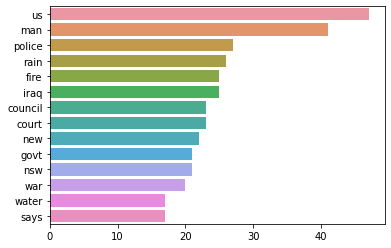

In [71]:
plot_top_non_stopwords_barchart(news['headline_text'])

In [131]:
import pandas as pd
info = pd.read_csv('test 2.csv')
info = info.replace('\n', '')
info['txt'] = info['txt'].str.replace(r'time ', '')

# Code Snippet for Top Non-Stopwords Barchart

import seaborn as sns
from nltk.corpus import stopwords
from collections import  Counter

def plot_top_non_stopwords_barchart(text):
    stop=set(stopwords.words('english'))
    
    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    counter=Counter(corpus)
    most=counter.most_common()
    x, y=[], []
    for word,count in most[:50]:
        if (word not in stop):
            x.append(word)
            y.append(count)
            
    sns.barplot(x=y,y=x)

#1st
plot_top_non_stopwords_barchart(info ['txt'])



AttributeError: 'DataFrame' object has no attribute 'str'

In [127]:


# Python program to generate WordCloud 
  
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
# Reads 'Youtube04-Eminem.csv' file  
df = pd.read_csv(r"test.csv", encoding ="latin-1") 
  
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df.CONTENT: 
  
 # typecaste each val to string 
 val = str(val) 
  
 # split the value 
 tokens = val.split() 
  
 # Converts each token into lowercase 
 for i in range(len(tokens)): 
 tokens[i] = tokens[i].lower() 
  
 comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
 background_color ='white', 
 stopwords = stopwords, 
 min_font_size = 10).generate(comment_words) 


IndentationError: expected an indented block (<ipython-input-127-7f72163ad76e>, line 25)

In [ ]:
  

    
    
    
# Import package
from wordcloud import WordCloud, STOPWORDS

# Generate word cloud
wordcloud = WordCloud(width = 3000, height = 2000, random_state=1, background_color='salmon', colormap='Pastel1', collocations=False, stopwords = STOPWORDS).generate(info['txt'])

# Plot
plot_cloud(wordcloud)



In [ ]:
# https://medium.com/analytics-vidhya/visualizing-phrase-prominence-and-category-association-with-scattertext-and-pytextrank-f7a5f036d4d2